### Class for generating bandit machines

In [108]:
import itertools
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
class Machines:
    import itertools
    
    def __init__(self, rewards, variances):
        self.num_of_machines = len(rewards)
        self.rewards = rewards
        if variances==None:
            self.variances = itertools.repeat(1, len(num_of_machines))
        else:
            self.variances = variances
            
    def get_machine_count(self):
        return(self.num_of_machines)
        
    def play_machine(self, machine_number):
        return(numpy.random.normal(loc=self.rewards[machine_number], scale=(self.variances[machine_number]**0.5)))
    
    
        

In [106]:
machine_rewards = [1,4,3,2,1,4,5,6,7,8,8,9,5,4,3,2,5,10,50,10,0]
machine_variances =  [1,2,3,2,1,3,4,5,6,7,5,3,2,1,1,2,4,0.1,4,3,0.01]

twenty_armed_bandit = Machines(machine_rewards,machine_variances)

In [107]:
print(twenty_armed_bandit.play_machine(1))
print(twenty_armed_bandit.play_machine(1))
print(twenty_armed_bandit.play_machine(20))
print(twenty_armed_bandit.play_machine(5))

4.789049400081933
5.507130771868707
0.10293188235259927
3.7764082645210824


### Implement Epsilon-greedy Strategy

In [138]:
bandit = twenty_armed_bandit

def epsilon_greedy_play(bandit,n,epsilon,rolling_sum=False):
    games_played = 0
    total_reward = [0]
    best_machine = 1
    while games_played < n:
        ### Setting up machines
        machines = list(range(0,bandit.get_machine_count()))
        machines.remove(best_machine) if best_machine in machines else print()
        machines = [-1] + machines
        prob_of_new_machine = (epsilon)/(len(machines)-1)

        ## Choosing best machine with prob epsilon, other machines with prob 1-epsilon
        machine_chosen = numpy.random.choice(a=machines, p=[1-epsilon] + [prob_of_new_machine]*(len(machines)-1))
        #print((best_machine,machine_chosen))

        ## If the machine chosen was the best one
        if machine_chosen==-1:
            r = total_reward.append(bandit.play_machine(best_machine))

        ## If we explored a new machine
        else:
            r = (bandit.play_machine(machine_chosen))
            if r>max(total_reward):
                best_machine = machine_chosen
            total_reward.append(r)
        games_played +=1
    if rolling_sum:
        return(numpy.cumsum(total_reward)) 
    else:
        return(sum(total_reward))

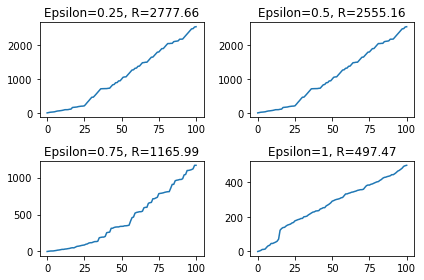

In [164]:

x = list(range(0,101))
y0 = epsilon_greedy_play(bandit=bandit, n=100, epsilon=0.25, rolling_sum=True)
y1 = epsilon_greedy_play(bandit=bandit, n=100, epsilon=0.5, rolling_sum=True)
y2 = epsilon_greedy_play(bandit=bandit, n=100, epsilon=0.75, rolling_sum=True)
y3 = epsilon_greedy_play(bandit=bandit, n=100, epsilon=1, rolling_sum=True)



#ax1 = plt.subplot() # creates first axis ax1.plot(x, y1, 'k-')
#plt.title("20-armed bandit, Epsilon=0.2,0.5,0.9")
#plt.xlabel("Time")
#plt.ylabel("Reward")


fig = plt.figure()

ax0 = fig.add_subplot(221)
ax0.set_title("Epsilon=0.25, " + "R=" + str(numpy.round(y0[-1],2)))
ax0.plot(x,y1)

ax1 = fig.add_subplot(222)
ax1.set_title("Epsilon=0.5, " + "R=" + str(numpy.round(y1[-1],2)))
ax1.plot(x,y1)

ax2 = fig.add_subplot(223)
ax2.set_title("Epsilon=0.75, " + "R=" + str(numpy.round(y2[-1],2)))
ax2.plot(x,y2)

ax3 = fig.add_subplot(224)
ax3.set_title("Epsilon=1, " + "R=" + str(numpy.round(y3[-1],2)))
ax3.plot(x,y3)

plt.tight_layout()
